In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [4]:
# Load dataset
df = pd.read_csv('BreastEW.csv')

In [6]:
# Encode categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [8]:
# Fill missing values
df.fillna(df.mean(), inplace=True)

In [10]:
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [12]:
# KMeans from scratch with tracking
k = 2
max_iter = 100
tol = 1e-4

In [14]:
# Randomly initialize centroids
rng = np.random.RandomState(42)
initial_idx = rng.permutation(len(scaled_data))[:k]
centroids = scaled_data[initial_idx]

iteration_sizes = []

for i in range(max_iter):
    distances = np.linalg.norm(scaled_data[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)

    unique, counts = np.unique(labels, return_counts=True)
    count_dict = {int(k): int(v) for k, v in zip(unique, counts)}
    iteration_sizes.append(count_dict)

    new_centroids = np.array([scaled_data[labels == j].mean(axis=0) for j in range(k)])

    if np.allclose(centroids, new_centroids, atol=tol):
        break

    centroids = new_centroids

# Assign cluster labels
df['Cluster'] = labels

In [16]:
# Print final counts
print("Final data point counts per cluster:")
print(df['Cluster'].value_counts().sort_index())

# Print iteration sizes
print("\nCluster sizes per iteration:")
for idx, counts in enumerate(iteration_sizes, 1):
    print(f"Iteration {idx}: {counts}")

Final data point counts per cluster:
Cluster
0    381
1    186
Name: count, dtype: int64

Cluster sizes per iteration:
Iteration 1: {0: 156, 1: 411}
Iteration 2: {0: 284, 1: 283}
Iteration 3: {0: 344, 1: 223}
Iteration 4: {0: 364, 1: 203}
Iteration 5: {0: 372, 1: 195}
Iteration 6: {0: 376, 1: 191}
Iteration 7: {0: 379, 1: 188}
Iteration 8: {0: 381, 1: 186}
Iteration 9: {0: 381, 1: 186}


In [22]:
print("Dataset matches predicted clusters:", "Yes" if np.array_equal(df['Cluster'], labels) else "No")

Dataset matches predicted clusters: Yes


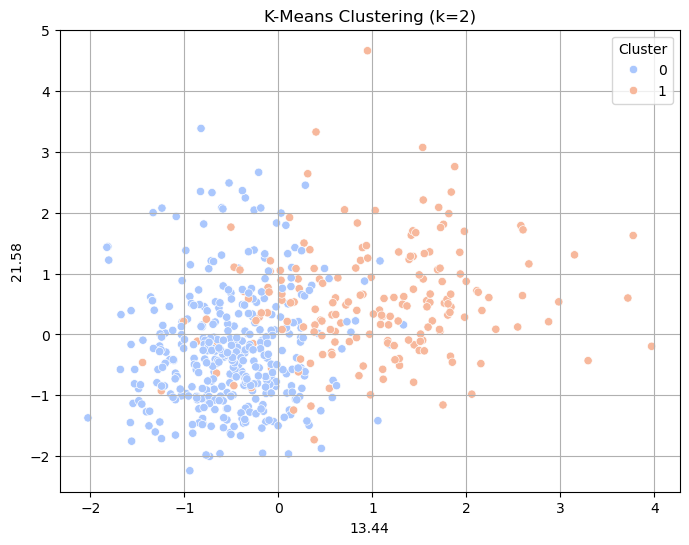

In [18]:
# Plot using first two scaled features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=labels, palette='coolwarm')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title('K-Means Clustering (k=2)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [20]:
# Number of clusters
print(f"\nTotal number of clusters: {len(np.unique(labels))}")


Total number of clusters: 2
